In [32]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [33]:
df = pd.read_csv("../input/weather-dataset-rattle-package/weatherAUS.csv", encoding="ISO-8859-1")

In [34]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


# EDA

In [35]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [36]:
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [37]:
df.shape

(145460, 23)

In [38]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [39]:
df.nunique()

Date             3436
Location           49
MinTemp           389
MaxTemp           505
Rainfall          681
Evaporation       358
Sunshine          145
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       546
Pressure3pm       549
Cloud9am           10
Cloud3pm           10
Temp9am           441
Temp3pm           502
RainToday           2
RainTomorrow        2
dtype: int64

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [41]:
df.isna().sum() 

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

# Feature Selection:

In [42]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [43]:
df = df[['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow']]


# Data Cleaning

In [44]:
df = df.fillna(df.mean())
df = df.dropna()
df.drop_duplicates(inplace = True)

In [45]:
print(df.isna().sum())
print(df.shape)

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64
(123710, 22)


In [46]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000
mean,12.413917,23.474808,2.375661,5.551665,7.669315,40.685280,15.011689,19.174578,67.664315,50.856904,1017.416706,1015.029505,4.422374,4.498630,17.268860,21.895705
std,6.366792,7.205898,8.528039,3.245612,2.782271,13.388636,8.307285,8.571039,18.975503,20.839568,6.765690,6.703817,2.280965,2.124822,6.477882,7.005865
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,7.000000,2.000000,2.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.800000,18.100000,0.000000,4.200000,7.611178,31.000000,9.000000,13.000000,56.000000,36.000000,1013.200000,1010.700000,3.000000,4.000000,12.500000,16.800000
50%,12.200000,23.000000,0.000000,5.468232,7.611178,39.000000,13.000000,19.000000,68.880831,51.539116,1017.649940,1015.255889,4.447461,4.509930,16.990631,21.500000
75%,17.000000,28.600000,0.800000,5.600000,9.000000,48.000000,20.000000,24.000000,81.000000,65.000000,1021.700000,1019.300000,6.000000,6.000000,21.900000,26.700000
max,33.900000,48.100000,367.600000,86.200000,14.500000,135.000000,87.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


# What is the average rainfall in Cairns ?

In [47]:
n1 = df[(df["Location"]=="Cairns")]
print("Average rainfall in Cairns: {:.2f}".format(np.mean(n1["Rainfall"])))

Average rainfall in Cairns: 5.68


# Which place has the rainfall above 200 cm?

In [48]:
n2 = df.sort_values("Rainfall")
n3 = n2[n2["Rainfall"]>200]
print(n3[["Location","Rainfall"]].to_string(index=False))

    Location  Rainfall
      Cairns     206.2
  Townsville     206.8
CoffsHarbour     208.5
      Darwin     210.6
CoffsHarbour     219.6
 Williamtown     225.0
  Townsville     236.8
      Cairns     247.2
      Cairns     268.6
      Cairns     278.4
      Darwin     367.6


In [49]:
lae=LabelEncoder()
df["Location"] = lae.fit_transform(df["Location"].astype(str))
df["WindGustDir"] = lae.fit_transform(df["WindGustDir"].astype(str))
df["WindDir9am"] = lae.fit_transform(df["WindDir9am"].astype(str))
df["WindDir3pm"] = lae.fit_transform(df["WindDir3pm"].astype(str))
df["RainToday"] = lae.fit_transform(df["RainToday"].astype(str))
df["RainTomorrow"] = lae.fit_transform(df["RainTomorrow"].astype(str))

In [50]:
df.describe().columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

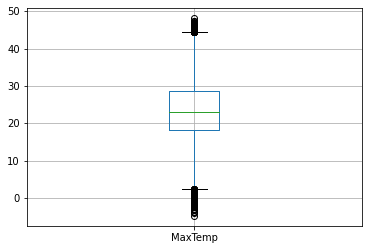

In [51]:
_ = df.boxplot(column=['MaxTemp'])

In [52]:
df = df[(df["MaxTemp"] > 2) & (df["MaxTemp"]  < 43)]
df.shape

(123219, 22)

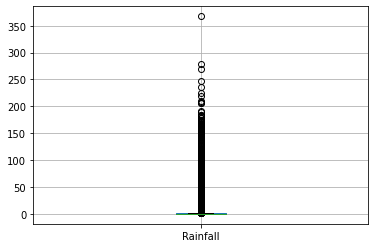

In [53]:
_ = df.boxplot(column=['Rainfall'])

In [54]:
df = df[df["Rainfall"]<5]
df.shape

(108872, 22)

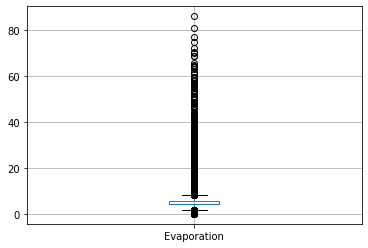

In [55]:
_ = df.boxplot(column=['Evaporation'])

In [56]:
df = df[df["Evaporation"]<8]
df.shape

(93550, 22)

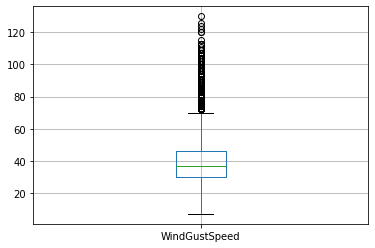

In [57]:
_ = df.boxplot(column=['WindGustSpeed'])

In [58]:
df = df[df["WindGustSpeed"]<78]
df.shape

(92455, 22)

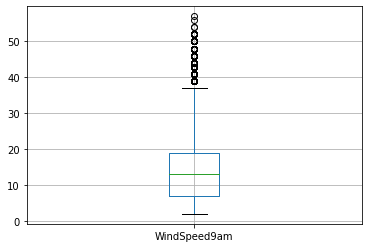

In [59]:
_ = df.boxplot(column=['WindSpeed9am'])

In [60]:
df = df[df["WindSpeed9am"]<41]
df.shape

(92036, 22)

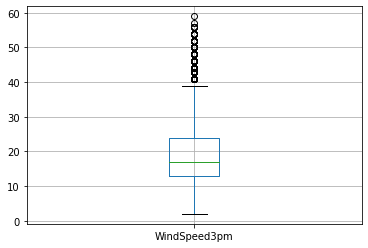

In [61]:
_ = df.boxplot(column=['WindSpeed3pm'])

In [62]:
df = df[df["WindSpeed3pm"]<41]
df.shape

(91065, 22)

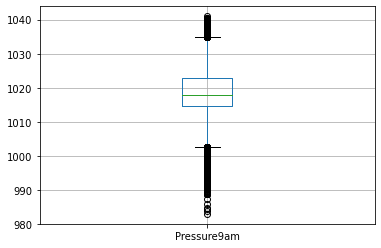

In [63]:
_ = df.boxplot(column=['Pressure9am'])

In [64]:
df = df[(df["Pressure9am"]>1003) & (df["Pressure9am"]<1035)]
df.shape

(89526, 22)

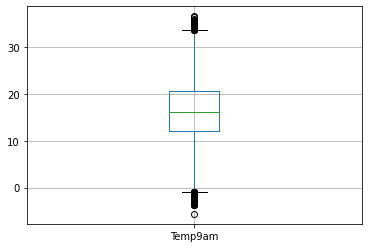

In [65]:
_ = df.boxplot(column=['Temp9am'])

In [66]:
df = df[df["Temp9am"]<34]
df.shape

(89485, 22)

In [67]:
df.describe()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,89485.000000,89485.000000,89485.000000,89485.000000,89485.000000,89485.000000,89485.000000,89485.000000,89485.000000,89485.000000,...,89485.000000,89485.000000,89485.000000,89485.000000,89485.000000,89485.000000,89485.000000,89485.000000,89485.000000,89485.000000
mean,22.606392,11.356233,22.767204,0.410421,4.730385,7.615488,7.645460,38.109393,7.249919,7.639191,...,68.574487,50.661382,1018.704788,1016.176254,4.412071,4.489007,16.397772,21.289919,0.131419,0.180466
std,13.555544,6.128733,6.563916,0.950382,1.642861,2.521366,4.641121,11.359370,4.543662,4.585137,...,17.195997,19.081114,6.044409,6.097162,2.165108,2.023644,6.064603,6.388631,0.337860,0.384577
min,0.000000,-8.200000,2.100000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,...,3.000000,1.000000,1003.100000,989.800000,0.000000,0.000000,-5.600000,-2.600000,0.000000,0.000000
25%,11.000000,7.000000,17.900000,0.000000,3.800000,7.611178,3.000000,30.000000,3.000000,4.000000,...,58.000000,37.000000,1014.800000,1012.200000,4.000000,4.000000,12.000000,16.700000,0.000000,0.000000
50%,23.000000,11.000000,22.300000,0.000000,5.468232,7.611178,8.000000,37.000000,7.000000,8.000000,...,69.000000,51.000000,1018.000000,1015.400000,4.447461,4.509930,16.100000,20.900000,0.000000,0.000000
75%,34.000000,15.600000,27.300000,0.200000,5.468232,8.500000,12.000000,44.000000,11.000000,12.000000,...,81.000000,63.000000,1022.700000,1020.300000,6.000000,6.000000,20.600000,25.600000,0.000000,0.000000
max,46.000000,30.200000,42.900000,4.900000,7.900000,14.300000,15.000000,76.000000,15.000000,15.000000,...,100.000000,100.000000,1034.900000,1034.900000,9.000000,8.000000,33.900000,42.300000,1.000000,1.000000


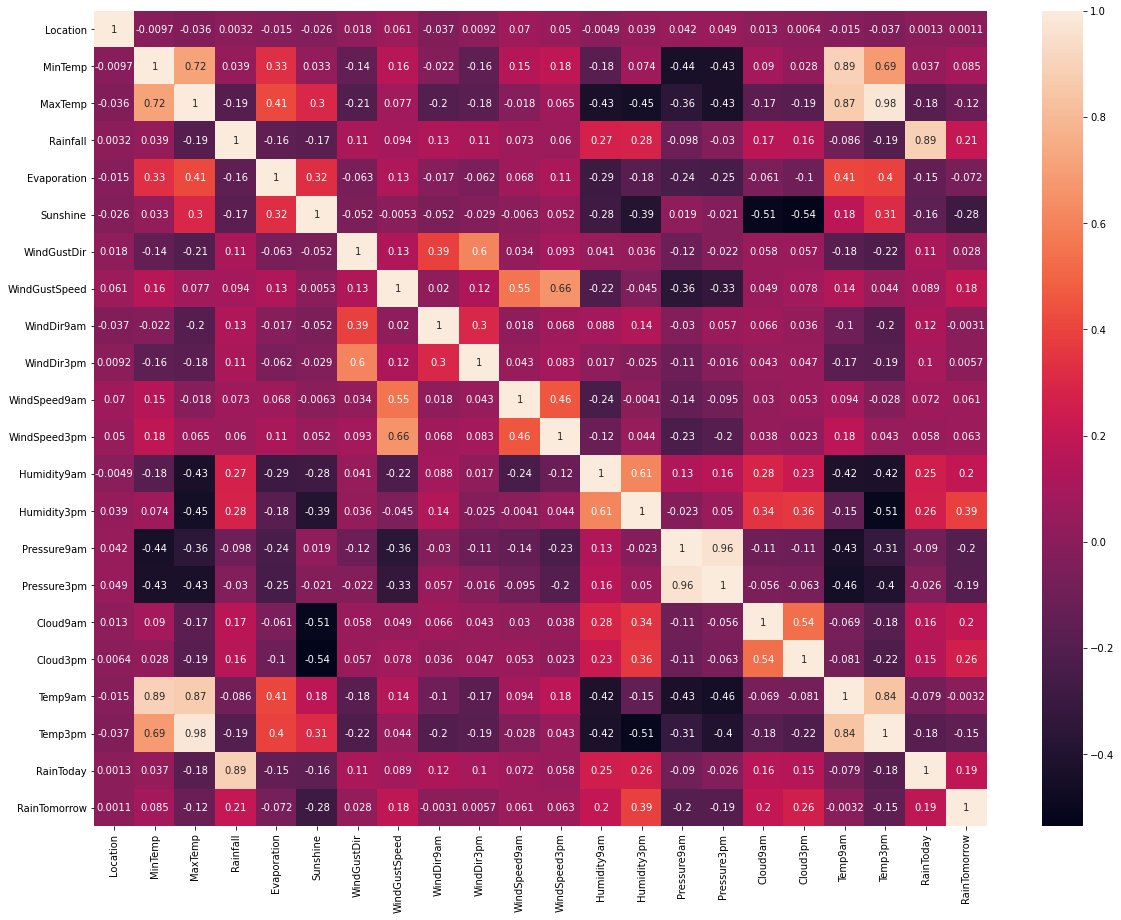

In [68]:
corelation = df.corr()
plt.subplots(figsize=(20,15))
_ = sns.heatmap(corelation,xticklabels=corelation.columns, yticklabels=corelation.columns,annot=True)

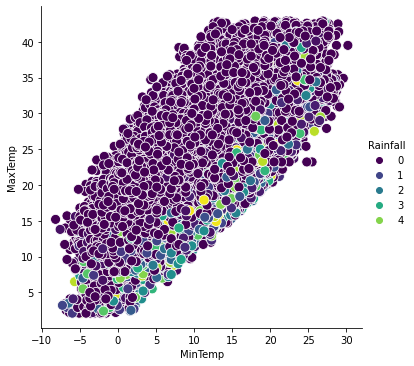

In [69]:
_ = sns.relplot(x="MinTemp",y="MaxTemp",hue="Rainfall",palette="viridis",data=df,s=100)

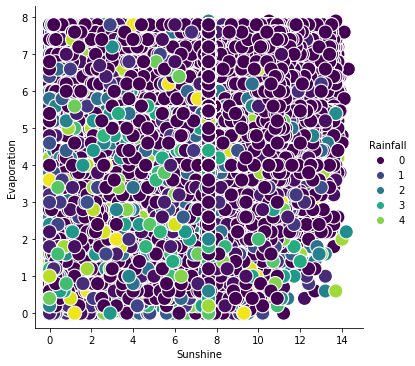

In [70]:
_ = sns.relplot(x="Sunshine",y="Evaporation",hue="Rainfall",palette="viridis",data=df,s=200)

In [71]:
X=df[['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday']].values
Y=df[['RainTomorrow']].values

In [72]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y)

# Logistic Regression

In [73]:
lr=LogisticRegression()
lr.fit(X_train,Y_train)
Y_pred1=lr.predict(X_test)
accuracy_score(Y_test,Y_pred1)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8550867155372788

# K-Nearest Neighbors (KNN)

In [74]:
knn=KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train,Y_train)
Y_pred2=knn.predict(X_test)
accuracy_score(Y_test,Y_pred2)

/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.8577686393706418

# Support Vector Machine (SVM)

In [75]:
svc=SVC()
svc.fit(X_train,Y_train)
Y_pred3=svc.predict(X_test)
accuracy_score(Y_test,Y_pred3)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.819327731092437